In [1]:
import scipy.io.wavfile as wav
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

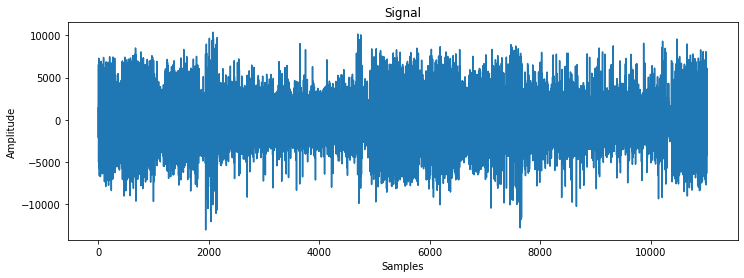

In [2]:
fs, data = wav.read('090729 1428 noaa-18.wav')
data_crop = data[20*fs:21*fs]
plt.figure(figsize=(12,4))
plt.plot(data_crop)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Signal")
plt.show()

In [3]:
resample = 4
data = data[::resample]
fs = fs//resample

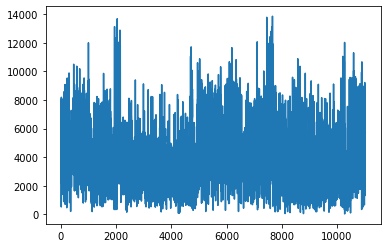

In [4]:
def hilbert(data):
    analytical_signal = signal.hilbert(data)
    amplitude_envelope = np.abs(analytical_signal)
    return amplitude_envelope
data_am = hilbert(data)
data_am_crop = hilbert(data_crop)
plt.plot(data_am_crop)
plt.show()

In [5]:
from PIL import Image
frame_width = int(0.5*fs)
w, h = frame_width, data_am.shape[0]//frame_width
image = Image.new('RGB', (w, h))
px, py = 0, 0
for p in range(data_am.shape[0]):
    lum = int(data_am[p]//32 - 32)
    if lum < 0: lum = 0
    if lum > 255: lum = 255
    image.putpixel((px, py), (lum, lum, lum))
    px += 1
    if px >= w:
        if (py % 50) == 0:
            print(f"Line saved {py} of {h}")
        px = 0
        py += 1
        if py >= h:
            break

Line saved 0 of 1780
Line saved 50 of 1780
Line saved 100 of 1780
Line saved 150 of 1780
Line saved 200 of 1780
Line saved 250 of 1780
Line saved 300 of 1780
Line saved 350 of 1780
Line saved 400 of 1780
Line saved 450 of 1780
Line saved 500 of 1780
Line saved 550 of 1780
Line saved 600 of 1780
Line saved 650 of 1780
Line saved 700 of 1780
Line saved 750 of 1780
Line saved 800 of 1780
Line saved 850 of 1780
Line saved 900 of 1780
Line saved 950 of 1780
Line saved 1000 of 1780
Line saved 1050 of 1780
Line saved 1100 of 1780
Line saved 1150 of 1780
Line saved 1200 of 1780
Line saved 1250 of 1780
Line saved 1300 of 1780
Line saved 1350 of 1780
Line saved 1400 of 1780
Line saved 1450 of 1780
Line saved 1500 of 1780
Line saved 1550 of 1780
Line saved 1600 of 1780
Line saved 1650 of 1780
Line saved 1700 of 1780
Line saved 1750 of 1780


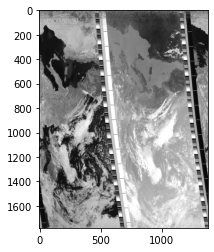

In [6]:
image = image.resize((w, h))
plt.imshow(image)
plt.show()